In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/Diamonds/diamonds.csv.bz2")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
correlation = df.corr(numeric_only=True).sort_values('price', ascending=False)
correlation

,carat,depth,table,price,x,y,z
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924


<Axes: >

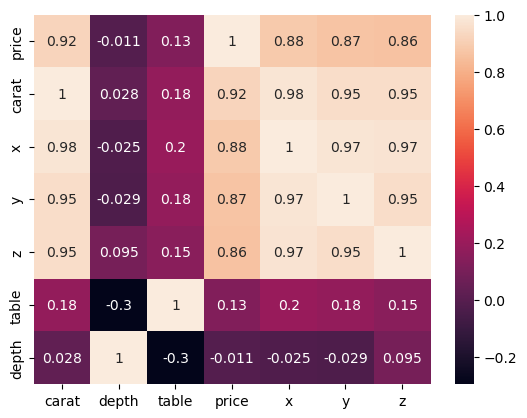

In [5]:
sns.heatmap(correlation, annot=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df[["carat", "x", "y", "z"]]
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

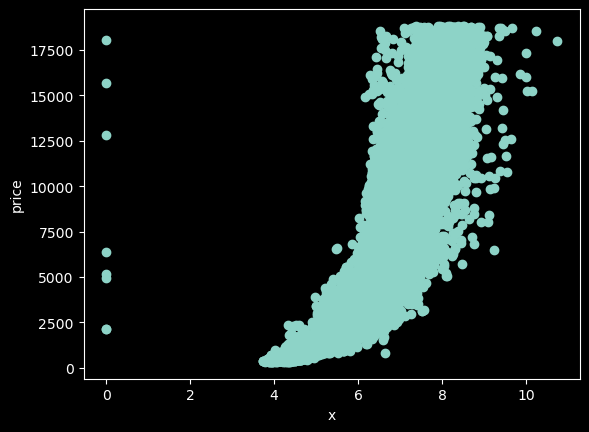

In [7]:
plt.scatter(df["x"], df["price"])
plt.xlabel("x")
plt.ylabel("price")
plt.show()

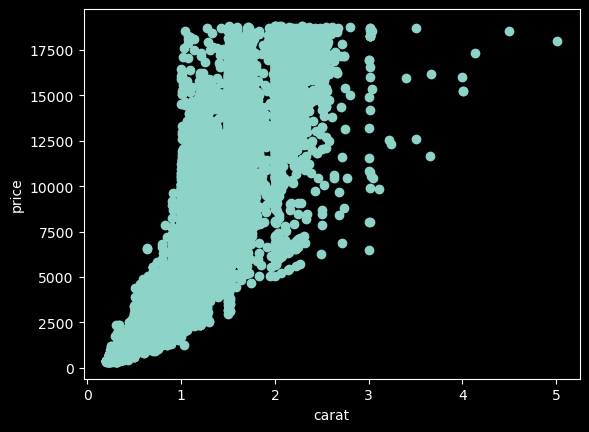

In [8]:
plt.scatter(df["carat"], df["price"])
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [9]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [10]:
print(linear.coef_)
print(linear.intercept_)

[[10206.3518214   -890.81428798   122.31658546  -467.22873409]]
[1851.11091409]


In [11]:
predictions = linear.predict(X_test)
predictions

array([[  99.31399658],
       [2064.55546394],
       [ 894.83148137],
       ...,
       [ 418.9858289 ],
       [7141.97820001],
       [6060.74159482]])

In [12]:
my_pred = linear.predict(np.array([[0.23, 3.95, 3.98, 2.43], [0.21, 3.89, 3.84, 2.31]]))
my_pred

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 31.30958178],
       [-80.42547124]])

In [13]:
print(linear.score(X_train, y_train))
print(linear.score(X_test, y_test))

0.853979694794473
0.8543165566039281
